In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Load data
df=pd.read_csv('/Users/jinli/Desktop/Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Data Analysis & Preparation
## Encoding target var: Churn
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
df['Churn'].mean()

0.2653698707936959

In [7]:
## TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [8]:
df.dropna().shape

(7032, 21)

In [9]:
df = df.dropna()

In [10]:
#- Continuous Vars
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [11]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
#These 3 elements have different scales, ANN performs better with normalized data, so we normalize the data with 2 steps,
#1. log-transforma; 2. normaization
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = np.log(df['tenure'])
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-4.586522e-15,4.688495e-14,7.150708e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.202244e+00,-1.882268e+00,-2.579056e+00
25%,-5.439028e-01,-7.583727e-01,-6.080585e-01
50%,3.392011e-01,3.885103e-01,1.950521e-01
75%,8.222652e-01,8.004829e-01,8.382338e-01
max,1.025543e+00,1.269576e+00,1.371323e+00


In [13]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [15]:
##- One-Hot Encoding
##one-hot encoding(一键编码)一键式编码是一种矢量表示形式，其中矢量中的所有元素均为0(除1以外，其他元素的值为1)，其中1表示指定元素类别的boolean。
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


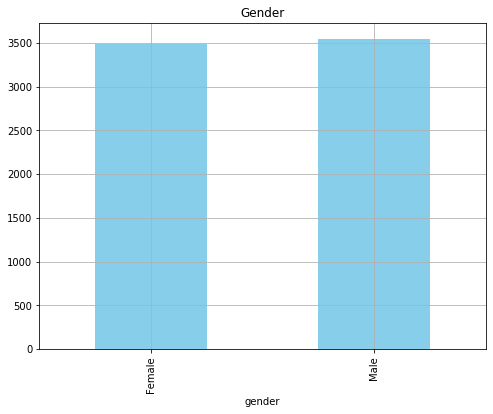

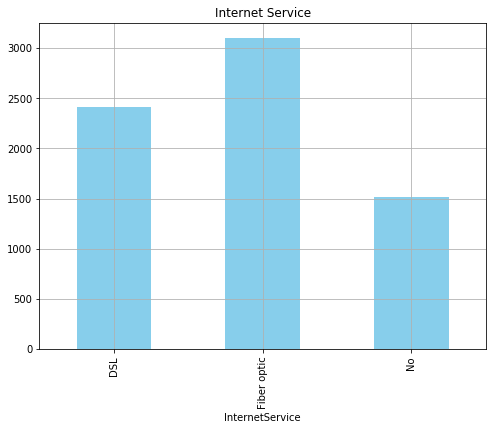

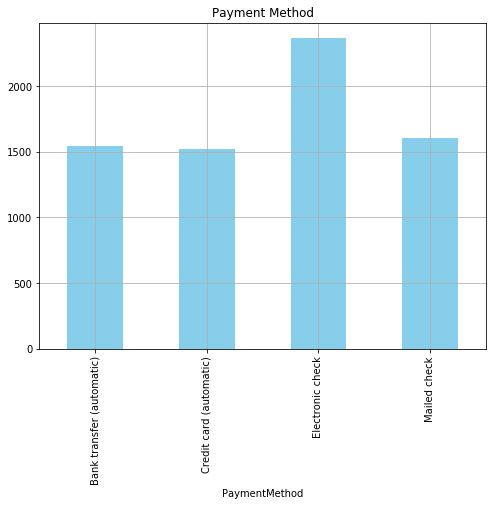

In [18]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [25]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [26]:
sample_set.head()

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-2.202244,-1.054244,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.459254,0.032896,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.679096,-0.061298,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.670810,-0.467578,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.679096,0.396862,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
# Train & Test Sets
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

In [42]:
#Aritificial Neural Network (ANN) with Keras
##激励函数（activation）：如果不用激励函数（其实相当于激励函数是f(x) = x），在这种情况下你每一层节点的输入都是上层输出的线性函数，
#无论你神经网络有多少层，输出都是输入的线性组合，与没有隐藏层效果相当，这种情况就是最原始的感知机（Perceptron）了，
#那么网络的逼近能力就相当有限。正因为上面的原因，我们决定引入非线性函数作为激励函数，这样深层神经网络表达能力就更加强大
#（不再是输入的线性组合，而是几乎可以逼近任意函数）。
#应用中如何选择合适的激活函数？这个问题目前没有确定的方法，凭一些经验吧
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
#loss function,optimizer,正则化:某次训练->得到了一组训练参数->loss function评价这组参数->调整参数降低loss function->下一次训练
#评价参数是loss function，降低loss function的东西叫做optimizer优化器(调整参数的东西就叫做optimizer).如果一昧的降低上面的误差值，最终可能过拟合，
#也就是为了迎合给出的训练集特意变成的那个样子。我们不希望如此。所以增加了一个正则化损失，用来强迫模型变得简单一些，不能像具体的情况那么复杂。
#metrics的中文是指標，同樣是用來計算目前模型的損失(有多錯)，但它是用來告訴AI工程師現在模型的狀況的。而loss function的損失基本上是直接對口到最佳化器。提供最佳化器最小化損失的線索。
#loss function(損失函數)是給機器看的，metrics(指標)是給人看的。loss function在keras裡面也有很多種，包括：
#1. mean-squre-error 這是回歸用的
#2. categorical_crossentropy 這是分類用的，分类数为2时使用binary_crossentropy
#综合Adam在很多情况下算作默认工作性能比较优秀的优化器。
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [40]:
#iteration：进行训练需要的总共的迭代次数。

#batchsize：进行一次iteration（迭代）所训练数据的数量。

#epoch：一次epoch是指将所有数据训练一遍的次数，epoch所代表的数字是指所有数据被训练的总轮数。

#例如：有49000个数据，计划进行十轮训练，那么epoch=10；一次训练迭代训练100个数据，batchsize=100，
#训练一轮总共要迭代490次（49000/100=490）。总的iteration=490*10=4900次。


X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

NameError: name 'train_test_split' is not defined

In [41]:
#大概要训练不到五千个数据，整体训练50轮。把数据切成100个，每一轮放进100个数据循环不到五十次。
model.fit(X_train, y_train, epochs=50, batch_size=100)

NameError: name 'X_train' is not defined

In [ ]:
#- Accuracy, Precision, Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

In [ ]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))
    

In [ ]:
#- ROC & AUC¶
from sklearn.metrics import roc_curve, auc
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]
# fpr:false positive rates; tpr:true positive rate 
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [ ]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In [ ]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()